In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix.csv')
print(df.shape)
df.info

(8790, 10)


<bound method DataFrame.info of      show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# Does netflix have more movies, or Tv shows?

In [7]:
plt.figure(figsize=(7,7))
pie_df = df['type'].value_counts().rename_axis('sub_values').reset_index(name='counts')
pie_df

,sub_values,counts
0,Movie,6126
1,TV Show,2664


<Figure size 504x504 with 0 Axes>

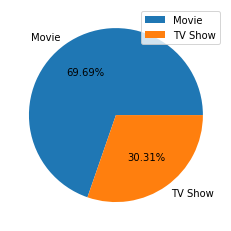

In [8]:
labels = pie_df.sub_values 
values = pie_df.counts 

plt.pie(x=values, labels=labels, autopct='%.2f%%')

plt.legend(loc='upper right')
plt.show()

As we can see the majority of the content is Movie which takes 69.9%.

#  What type of content does netflix have to offer?

In [9]:
plt.figure(figsize=(7,7))
bar_df = df['rating'].value_counts().rename_axis('category').reset_index(name='count')
bar_df

,category,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


<Figure size 504x504 with 0 Axes>

<AxesSubplot:xlabel='category', ylabel='count'>

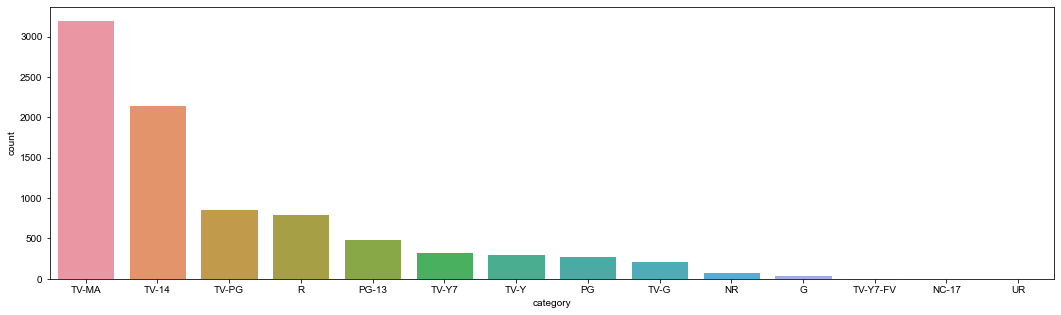

In [10]:
f, ax = plt.subplots(figsize=(18,5))
sns.set_style('darkgrid')
sns.barplot(x='category',y='count',data=bar_df)

We can see that most contents on Netflix are rated TV-MA.

# The amount of content added over the years.

In [11]:
plt.figure(figsize=(7,7))
df['date_added'] = pd.to_datetime(df.date_added)
df['year'] = df['date_added'].dt.strftime('%Y')
yearly_df = df['year'].value_counts().rename_axis('year').reset_index(name='amount').sort_values(by= ['year'])
yearly_df

,year,amount
12,2008,2
11,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,11
7,2014,24
6,2015,82
5,2016,426
4,2017,1185


<Figure size 504x504 with 0 Axes>

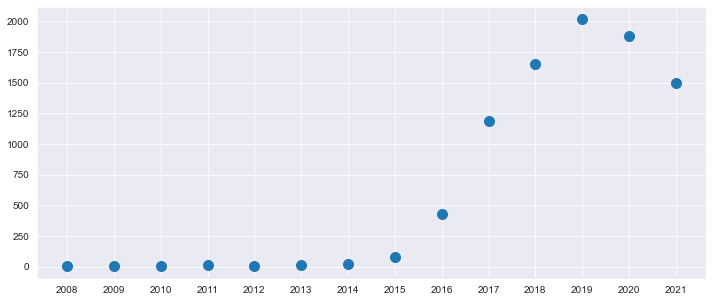

In [12]:
x = yearly_df.year
y = yearly_df.amount
plt.figure(figsize=(12,5))
plt.scatter(x,y,s=100)

according to the data, 2019 had the highest amount of content added